Now we start with importing 

In [280]:
import warnings
warnings.filterwarnings("ignore")

import os
import random
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [281]:
# init dataset
df = pd.read_csv('./crx.csv')

In [282]:
df.head()

b  30.83      0  u  g  w  v  1.25  t t.1  1  f g.1  202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t  6  f   g   43  560  +
1  a   24.5  0.500  u  g  q  h  1.50  t   f  0  f   g  280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t  5  t   g  100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f  0  f   s  120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f  0  t   g  360    0  +

In [283]:
# adding header
df.columns =['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 
               'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14',
              'A15', 'A16']

In [284]:
df.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13  A14  A15 A16
0  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43  560   +
1  a   24.5  0.500  u  g  q  h  1.50  t   f    0   f   g  280  824   +
2  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100    3   +
3  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120    0   +
4  b  32.08  4.000  u  g  m  v  2.50  t   f    0   t   g  360    0   +

In [285]:
#replace nan-value
df = df.replace(to_replace='?',value=np.nan)

In [286]:
df.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13  A14  A15 A16
0  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43  560   +
1  a   24.5  0.500  u  g  q  h  1.50  t   f    0   f   g  280  824   +
2  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100    3   +
3  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120    0   +
4  b  32.08  4.000  u  g  m  v  2.50  t   f    0   t   g  360    0   +

In [287]:
df.nunique()

A1       2
A2     348
A3     215
A4       3
A5       3
A6      14
A7       9
A8     132
A9       2
A10      2
A11     23
A12      2
A13      3
A14    169
A15    240
A16      2
dtype: int64

In [288]:
#convert number value which were object
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')
df['A15'].astype('float')

0      560.0
1      824.0
2        3.0
3        0.0
4        0.0
       ...  
684      0.0
685    394.0
686      1.0
687    750.0
688      0.0
Name: A15, Length: 689, dtype: float64

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      677 non-null    object 
 1   A2      677 non-null    float64
 2   A3      689 non-null    float64
 3   A4      683 non-null    object 
 4   A5      683 non-null    object 
 5   A6      680 non-null    object 
 6   A7      680 non-null    object 
 7   A8      689 non-null    float64
 8   A9      689 non-null    object 
 9   A10     689 non-null    object 
 10  A11     689 non-null    int64  
 11  A12     689 non-null    object 
 12  A13     689 non-null    object 
 13  A14     676 non-null    object 
 14  A15     689 non-null    int64  
 15  A16     689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.2+ KB


In [290]:
#let's get rid of nan
df2=df.dropna()
df2=df.dropna(axis=0)

In [291]:
#Now we convert our 'a' and 'b' to a numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df2[col].dtypes=='object':
        df2[col]=le.fit_transform(df2[col])

In [292]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    int64  
 1   A2      652 non-null    float64
 2   A3      652 non-null    float64
 3   A4      652 non-null    int64  
 4   A5      652 non-null    int64  
 5   A6      652 non-null    int64  
 6   A7      652 non-null    int64  
 7   A8      652 non-null    float64
 8   A9      652 non-null    int64  
 9   A10     652 non-null    int64  
 10  A11     652 non-null    int64  
 11  A12     652 non-null    int64  
 12  A13     652 non-null    int64  
 13  A14     652 non-null    int64  
 14  A15     652 non-null    int64  
 15  A16     652 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.6 KB


In [293]:
df2.describe()

A1          A2          A3          A4          A5          A6  \
count  652.000000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean     0.688650   31.504847    4.836940    1.230061    0.469325    5.763804   
std      0.463401   11.847327    5.027369    0.428427    0.846413    4.292605   
min      0.000000   13.750000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   22.580000    1.040000    1.000000    0.000000    1.000000   
50%      1.000000   28.375000    2.855000    1.000000    0.000000    6.000000   
75%      1.000000   38.250000    7.500000    1.000000    0.000000   10.000000   
max      1.000000   76.750000   28.000000    2.000000    2.000000   13.000000   

               A7          A8          A9         A10         A11         A12  \
count  652.000000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean     5.081288    2.245821    0.533742    0.438650    2.504601    0.463190   
std      2.495062    3.373483    0.499243    0.496603    4.971962    0.499026   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.165000    0.000000    0.000000    0.000000    0.000000   
50%      7.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
75%      7.000000    2.625000    1.000000    1.000000    3.000000    1.000000   
max      8.000000   28.500000    1.000000    1.000000   67.000000    1.000000   

              A13         A14            A15         A16  
count  652.000000  652.000000     652.000000  652.000000  
mean     0.165644   51.940184    1015.315951    0.547546  
std      0.548858   50.875358    5257.161359    0.498116  
min      0.000000    0.000000       0.000000    0.000000  
25%      0.000000    3.750000       0.000000    0.000000  
50%      0.000000   39.000000       5.000000    1.000000  
75%      0.000000   86.000000     400.000000    1.000000  
max      2.000000  162.000000  100000.000000    1.000000

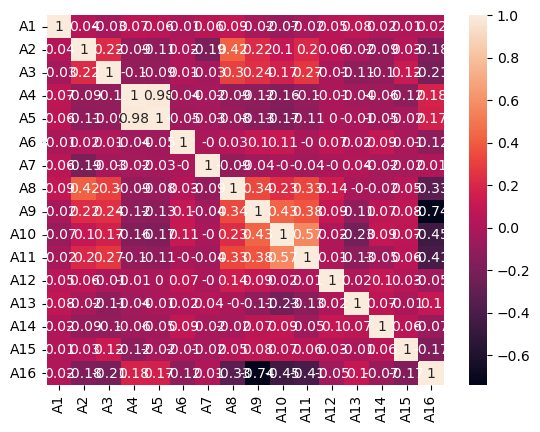

In [294]:
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [295]:
X = pd.get_dummies(df2.drop('A16', axis=1))
y = df2['A16']

In [296]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: A16, dtype: int64

In [297]:
df2.head()

A1     A2     A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13  A14  A15  \
0   0  58.67  4.460   1   0  10   3  3.04   1    1    6    0    0  112  560   
1   0  24.50  0.500   1   0  10   3  1.50   1    0    0    0    0   70  824   
2   1  27.83  1.540   1   0  12   7  3.75   1    1    5    1    0    1    3   
3   1  20.17  5.625   1   0  12   7  1.71   1    0    0    0    2    7    0   
4   1  32.08  4.000   1   0   9   7  2.50   1    0    0    1    0   92    0   

   A16  
0    0  
1    0  
2    0  
3    0  
4    0

In [298]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((521, 15), (521,), (131, 15), (131,))

In [299]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

Learning rate set to 0.007799
0:	learn: 0.6857955	total: 1.77ms	remaining: 1.77s
1:	learn: 0.6784071	total: 3.49ms	remaining: 1.74s
2:	learn: 0.6711230	total: 4.8ms	remaining: 1.59s
3:	learn: 0.6636088	total: 6.29ms	remaining: 1.57s
4:	learn: 0.6571350	total: 7.13ms	remaining: 1.42s
5:	learn: 0.6498979	total: 8.37ms	remaining: 1.39s
6:	learn: 0.6433439	total: 9.63ms	remaining: 1.36s
7:	learn: 0.6359269	total: 10.8ms	remaining: 1.34s
8:	learn: 0.6290288	total: 11.9ms	remaining: 1.31s
9:	learn: 0.6223318	total: 12.9ms	remaining: 1.28s
10:	learn: 0.6162752	total: 13.9ms	remaining: 1.25s
11:	learn: 0.6095317	total: 14.9ms	remaining: 1.23s
12:	learn: 0.6032451	total: 15.7ms	remaining: 1.19s
13:	learn: 0.5976626	total: 16.5ms	remaining: 1.16s
14:	learn: 0.5900097	total: 17.4ms	remaining: 1.14s
15:	learn: 0.5846432	total: 18.3ms	remaining: 1.12s
16:	learn: 0.5784028	total: 19.1ms	remaining: 1.11s
17:	learn: 0.5728126	total: 20ms	remaining: 1.09s
18:	learn: 0.5672608	total: 20.9ms	remaining: 1

In [300]:
print(cat.score(X_train, y_train))
print(cat.score(X_test, y_test))

0.9884836852207294
0.8702290076335878


In [301]:
y_pred = cat.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [302]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  9],
       [ 8, 64]])

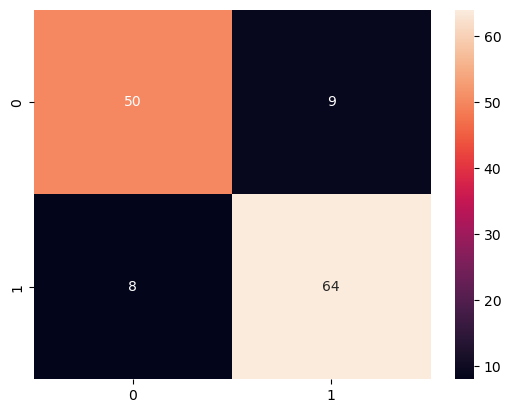

In [303]:
import seaborn as sns

sns.heatmap(pd.DataFrame(cm), annot=True)

cat: ROC AUC=0.932


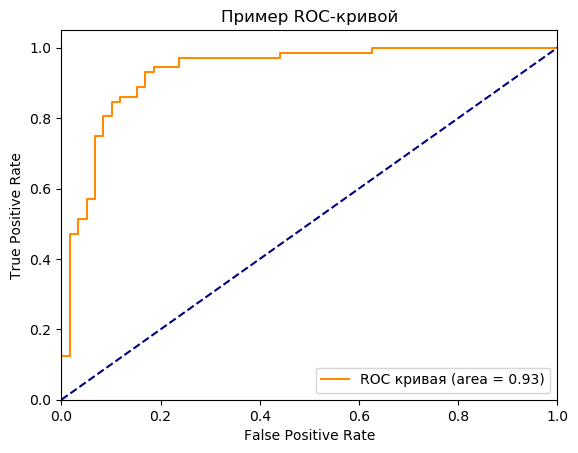

In [337]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# получаем предказания
lr_probs = cat.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('cat: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [338]:
tree = RandomForestClassifier(n_estimators=200, min_samples_split=20, min_samples_leaf=20)

In [339]:
tree.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       n_estimators=200)

In [340]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8848368522072937
0.8473282442748091


In [341]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [342]:
CV_rfc = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_leaf=20,
                                              min_samples_split=20,
                                              n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [343]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [344]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='entropy')

In [345]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       n_estimators=200, random_state=42)

In [346]:
print(rfc1.score(X_train, y_train))
print(rfc1.score(X_test, y_test))

0.9692898272552783
0.8549618320610687


In [347]:
y_pred1 = rfc1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [357]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[50,  9],
       [10, 62]])

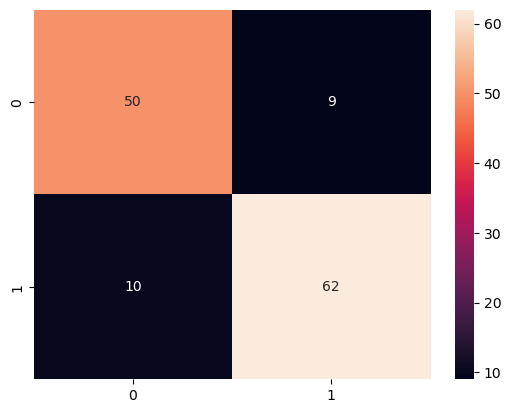

In [349]:
sns.heatmap(pd.DataFrame(cm1), annot=True)

RFC: ROC AUC=0.925


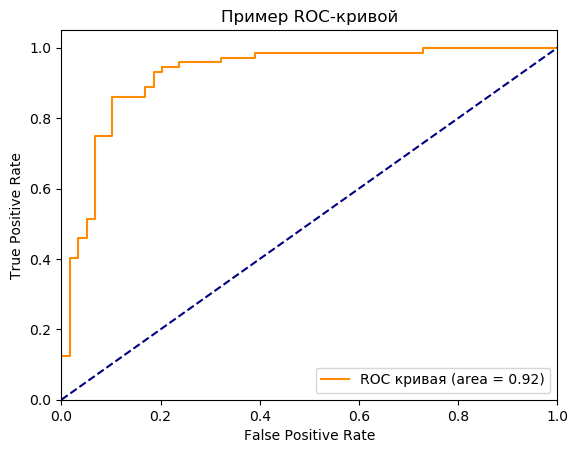

In [350]:
# получаем предказания
lr_probs = rfc1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('RFC: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [351]:
des_tree = DecisionTreeClassifier(max_depth = 8, min_samples_split=100, min_samples_leaf=100)
des_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=100)

In [352]:
print(des_tree.score(X_train, y_train))
print(des_tree.score(X_test, y_test))

0.8694817658349329
0.8396946564885496


In [353]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [354]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='auto',
                       random_state=1024)

In [355]:
des_tree1 = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='auto',
                       random_state=1024)
des_tree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='auto',
                       random_state=1024)

In [358]:
print(des_tree1.score(X_train, y_train))
print(des_tree1.score(X_test, y_test))

0.8694817658349329
0.8396946564885496


In [359]:
y_pred2 = des_tree1.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [360]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[54,  5],
       [16, 56]])

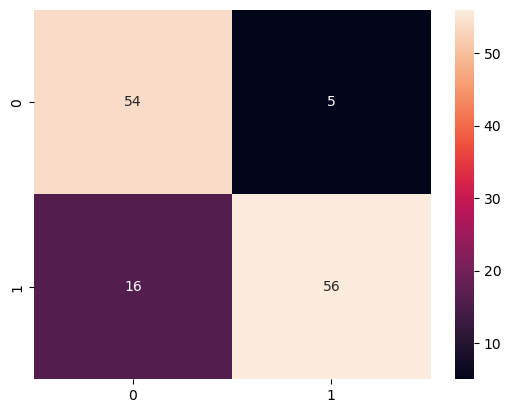

In [361]:
sns.heatmap(pd.DataFrame(cm2), annot=True)

DT: ROC AUC=0.887


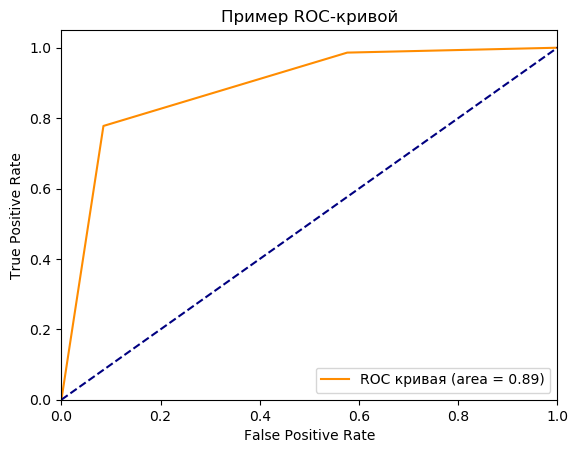

In [362]:
# получаем предказания
lr_probs = des_tree1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('DT: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [364]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=5

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  71.7557251908397
